In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

In [5]:
gdf = gdf[["constituency", "geometry"]]
gdf.rename(columns={"constituency": "Constituency"}, inplace=True)

In [6]:
df = pd.read_csv("All Predictions.csv")


In [7]:
df = pd.merge(gdf, df, on="Constituency")

In [8]:
def map_constituency(constituency:str):
    party_colours = {"con":"#0087DC", "lab":"#E4003B","ld":"#FAA61A" ,"grn":"#02A95B", "ref":"#12B6CF",  "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}
    cdf = df[df["Constituency"] == constituency]
    ax = gdf.plot(figsize=(20,20), color="lightgray", edgecolor="none")
    cdf.plot(ax=ax, color=party_colours[cdf["2019_winner"].iloc[0]], edgecolor="black")
    plt.show()

In [84]:
def constituency_predictions(constituency:str, show:str):
    party_colours = {"con":"#0087DC", "lab":"#E4003B","ld":"#FAA61A" ,"grn":"#02A95B", "ref":"#12B6CF",  "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}
    if constituency not in df["constituency"].unique():
        raise KeyError("Invalid constituency")
    cdf = df[df["Constituency"] == constituency]
    if show == "all":
        fig, axes = plt.subplots(4,2, figsize=(20,40))
    else:
        fig, axes = plt.subplots(1,2, figsize=(10,5))

    print(cdf["PCON24CD"])

    #fig.suptitle(constituency, fontsize=20)
    fig.tight_layout()

    colours = sns.color_palette(list(party_colours.values()))

    parties = ["con", "lab", "ld", "grn", "ref", "snp", "pc", "other"]

    if show == "mean" or show == "all":
        if show == "mean":
            pos = 1
        else:
            pos = 0,1
        means = cdf[["mean_Con", "mean_Lab", "mean_LDem", "mean_Grn", "mean_Ref", "mean_SNP", "mean_PC","mean_Other"]]
        sns.barplot(ax = axes[pos], x=list(means.columns), y=means.iloc[0], palette=colours, hue=list(means.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("2024 Average")
        for i in range(len(party_colours.keys())):
            axes[pos].text(list(means.columns)[i], means.iloc[0, i], f'{round(means.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    if show == "all":
        pos = 0,0
    else:
        pos = 0
    prev = cdf[["con_%_2019", "lab_%_2019", "ld_%_2019", "grn_%_2019", "ref_2019_%", "snp_2019_%", "pc_2019_%","other_2019_%"]]
    sns.barplot(ax = axes[pos], x=list(prev.columns), y=prev.iloc[0], palette=colours, hue=list(prev.columns))
    axes[pos].set_xticklabels(parties)
    axes[pos].set_ylabel("")
    axes[pos].set_title("2019 Result (Notional)")
    for i in range(len(parties)):
        axes[pos].text(list(prev.columns)[i], prev.iloc[0, i], f'{round(prev.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    if show == "bp" or show == "all":
        if show == "bp":
            pos = 1
        else:
            pos = 1,0
        bp = cdf[["BP_Con", "BP_Lab", "BP_LDem", "BP_Grn", "BP_Ref", "BP_SNP", "BP_PC","BP_Other"]]
        sns.barplot(ax = axes[pos], x=list(bp.columns), y=bp.iloc[0], palette=colours, hue=list(bp.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Britain Predicts")
        for i in range(len(parties)):
            axes[pos].text(list(bp.columns)[i], bp.iloc[0, i], f'{round(bp.iloc[0,i],1)}%', color='black', ha="center", va="bottom")
        

    if show == "em" or show == "all":
        if show == "em":
            pos = 1
        else:
            pos = 1,1
        em = cdf[["EM_Con", "EM_Lab", "EM_LDem", "EM_Grn", "EM_Ref", "EM_SNP", "EM_PC", "EM_Other"]]
        sns.barplot(ax = axes[pos], x=list(em.columns), y=em.iloc[0], palette=colours, hue=list(em.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Election Maps UK")
        for i in range(len(parties)):
            axes[pos].text(list(em.columns)[i], em.iloc[0, i], f'{round(em.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    if show == "e" or show == "all":
        if show == "e":
            pos = 1
        else:
            pos = 2,0
        e = cdf[["E_Con", "E_Lab", "E_LDem", "E_Grn", "E_Ref", "E_SNP", "E_PC", "E_Other"]]
        sns.barplot(ax=axes[pos], x=list(e.columns), y=e.iloc[0], palette=colours, hue=list(e.columns))
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("The Economist")
        for i in range(len(parties)):
            axes[pos].text(list(e.columns)[i], e.iloc[0, i], f'{round(e.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    if show == "y" or show == "all":
        if show == "y":
            pos = 1
        else:
            pos = 2,1
        yg = cdf[["Y_Con", "Y_Lab", "Y_LDem", "Y_Grn", "Y_Ref", "Y_SNP", "Y_PC", "Y_Other"]]
        sns.barplot(ax=axes[pos], x=list(yg.columns), y=yg.iloc[0], palette=colours, hue=list(yg.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("YouGov")
        for i in range(len(parties)):
            axes[pos].text(list(yg.columns)[i], yg.iloc[0, i], f'{round(yg.iloc[0,i],1)}%', color='black', ha="center", va="bottom")

    if show == "s" or show == "all":
        if show == "s":
            pos = 1
        else:
            pos = 3,0
        sv = cdf[["S_Con", "S_Lab", "S_LDem", "S_Grn", "S_Ref", "S_SNP", "S_PC", "S_Other"]]
        sns.barplot(ax=axes[pos], x=list(sv.columns), y=sv.iloc[0], palette=colours, hue=list(sv.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("Survation")
        for i in range(len(parties)):
            axes[pos].text(list(sv.columns)[i], sv.iloc[0, i], f'{round(sv.iloc[0,i],1)}%', color='black', ha="center", va="bottom")    

    if show == "mc" or show == "all":
        if show == "mc":
            pos = 1
        else:
            pos = 3,1
        mc = cdf[["MC_Con", "MC_Lab", "MC_LDem", "MC_Grn", "MC_Ref", "MC_SNP", "MC_PC", "MC_Other"]]
        sns.barplot(ax=axes[3,1], x=list(mc.columns), y=mc.iloc[0], palette=colours, hue=list(mc.columns), legend=False)
        axes[pos].set_xticklabels(parties)
        axes[pos].set_ylabel("")
        axes[pos].set_title("More in Common")
        for i in range(len(parties)):
            axes[pos].text(list(mc.columns)[i], mc.iloc[0, i], f'{round(mc.iloc[0,i],1)}%', color='black', ha="center", va="bottom")    

    plt.show()




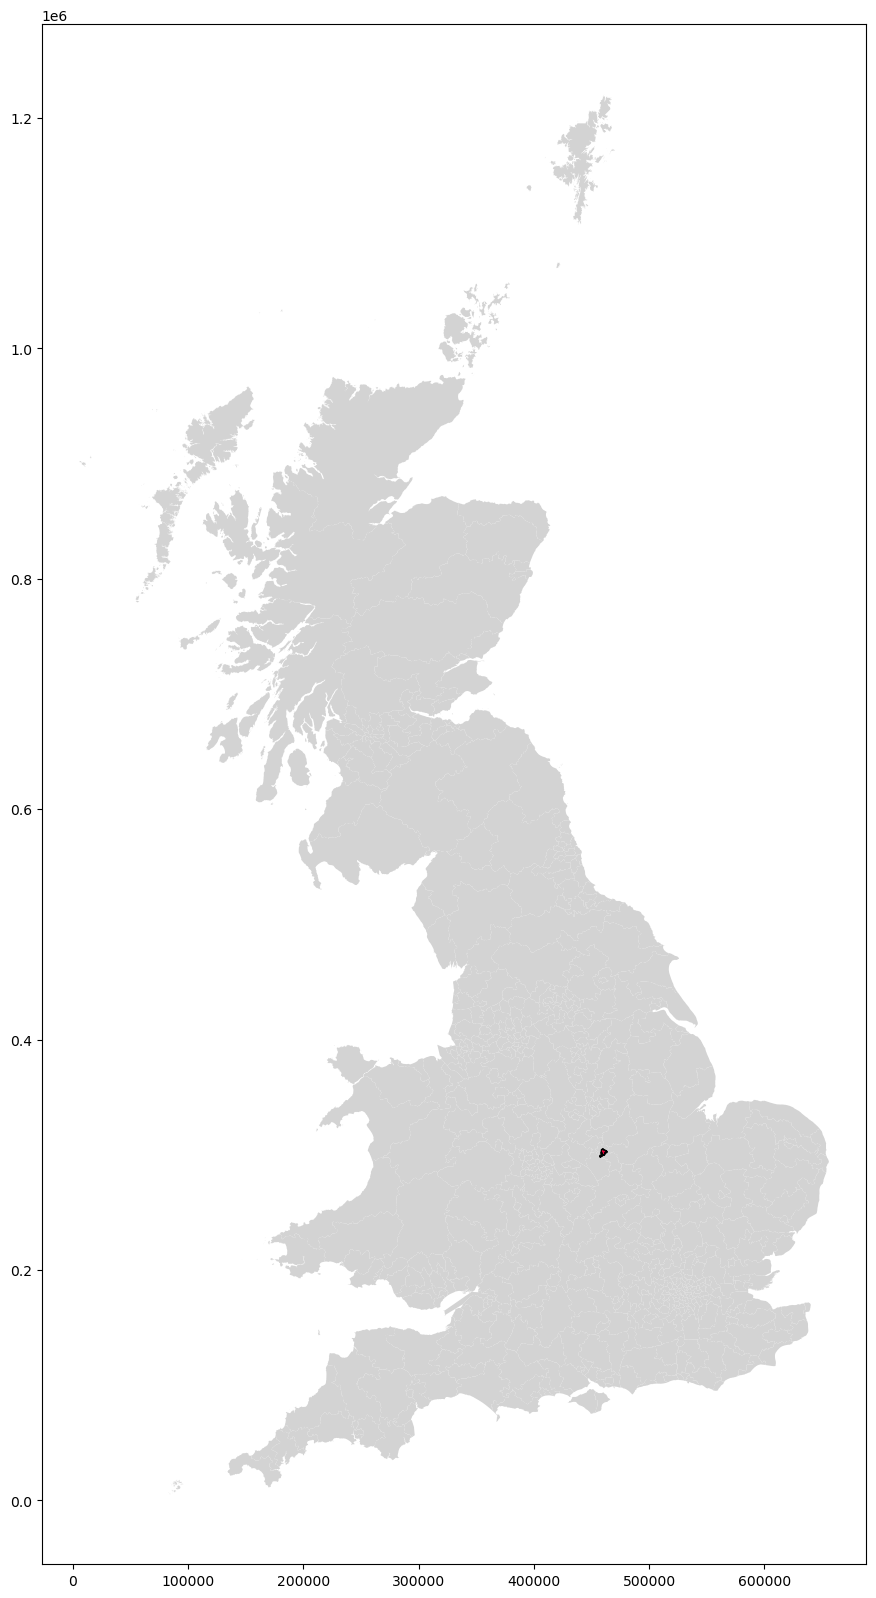

264    E14001327
Name: PCON24CD, dtype: object


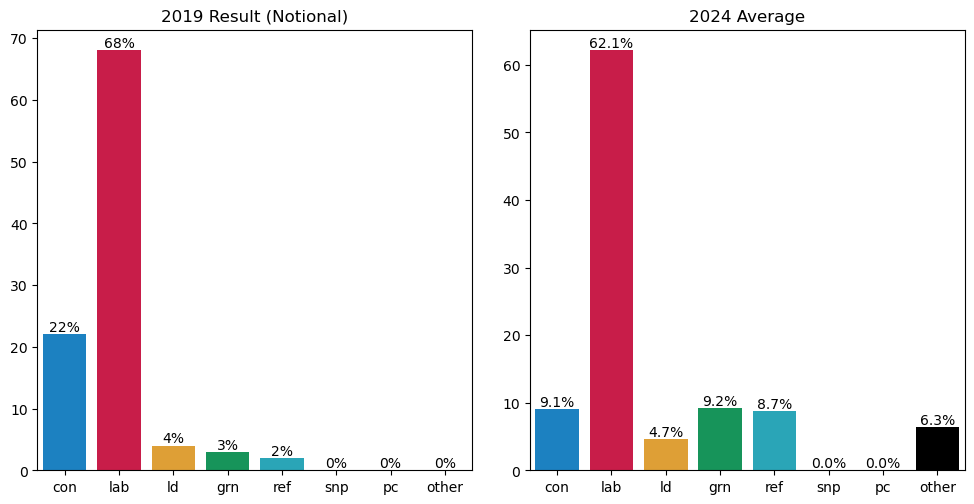

In [89]:
constituency = "Leicester South"

map_constituency(constituency)
constituency_predictions(constituency, show="mean")

In [29]:
df[df["constituency"] == constituency]["turnout"]

468    59.8
Name: turnout, dtype: float64

0      E14001063
1      E14001064
2      E14001065
3      E14001066
4      E14001067
         ...    
627    W07000108
628    W07000109
629    W07000110
630    W07000111
631    W07000112
Name: PCON24CD, Length: 632, dtype: object

In [63]:
df[["constituency"]].to_csv("2024 Results.csv")

In [70]:
res = df[["constituency", "2019_winner"]].sort_values("constituency").set_index("constituency")
res.to_csv("Results.csv")